In [1]:
import csv
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_hdf5'

In [3]:
NUM_CLASSES = 4

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1,(21*2)+ 1)))

In [5]:
Y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

/var/folders/v6/rj0rjt8x0c9_f_dcfqgnsg6r0000gn/T/ipykernel_41533/3633595330.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  Y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))


In [6]:
import numpy as np
import os

print("Working directory:", os.getcwd())
print("\nChecking CSV file...")

csv_path = 'model/keypoint_classifier/keypoint.csv'
print(f"Full path: {os.path.abspath(csv_path)}")
print(f"File exists: {os.path.exists(csv_path)}")

if os.path.exists(csv_path):
    file_size = os.path.getsize(csv_path)
    print(f"File size: {file_size} bytes")
    
    # Try to read first few lines
    with open(csv_path, 'r') as f:
        lines = f.readlines()
    print(f"Number of lines: {len(lines)}")
    
    if len(lines) > 0:
        print(f"\nFirst line: {lines[0][:100]}...")
        
        # Try loading with numpy
        try:
            X_dataset = np.loadtxt(csv_path, delimiter=',', dtype='float32', usecols=list(range(0, 42)))
            Y_dataset = np.loadtxt(csv_path, delimiter=',', dtype='int32', usecols=(42,))
            print(f"\n✅ Successfully loaded!")
            print(f"X_dataset shape: {X_dataset.shape}")
            print(f"Y_dataset shape: {Y_dataset.shape}")
            print(f"Unique classes: {np.unique(Y_dataset)}")
        except Exception as e:
            print(f"\n❌ Error loading: {e}")
    else:
        print("\n❌ FILE IS EMPTY!")
else:
    print("\n❌ FILE DOESN'T EXIST!")

Working directory: /Users/srishtisingh/Documents/hand-gesture-recognition-mediapipe

Checking CSV file...
Full path: /Users/srishtisingh/Documents/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint.csv
File exists: True
File size: 1957143 bytes
Number of lines: 2420

First line: 0.0,0.0,-0.1309167467697889,-0.08997657528532158,-0.24476431010051167,-0.25684114257110957,-0.334814...

✅ Successfully loaded!
X_dataset shape: (2420, 42)
Y_dataset shape: (2420,)
Unique classes: [0 1 2 3]


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dataset, Y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Input((21*2, )),
    layers.Dropout(0.2),
    layers.Dense(20, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1114 (4.35 KB)
Trainable params: 1114 (4.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, Y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/15 [=>............................] - ETA: 2s - loss: 1.4221 - accuracy: 0.2422
Epoch 1: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 4s 274ms/step - loss: 1.3667 - accuracy: 0.2898 - val_loss: 1.2810 - val_accuracy: 0.3091
Epoch 2/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.3079 - accuracy: 0.3438
Epoch 2: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 38ms/step - loss: 1.2955 - accuracy: 0.3521 - val_loss: 1.1828 - val_accuracy: 0.5438
Epoch 3/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.2519 - accuracy: 0.3984
Epoch 3: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 1.2316 - accuracy: 0.4342 - val_loss: 1.0953 - val_accuracy: 0.9421
Epoch 4/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.2007 - accuracy: 0.4219
Epoch 4: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 1.1576 - accuracy: 0.4832 - val_loss: 1.0191 - val_accuracy: 0.8562
Epoch 5/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.1856 - accuracy: 0.5000
Epoch 5: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 1.1090 - accuracy: 0.4860 - val_loss: 0.9410 - val_accuracy: 0.7025
Epoch 6/1000
 1/15 [=>............................] - ETA: 0s - loss: 1.0721 - accuracy: 0.5547
Epoch 6: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 39ms/step - loss: 1.0570 - accuracy: 0.5157 - val_loss: 0.8572 - val_accuracy: 0.7025
Epoch 7/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9887 - accuracy: 0.5859
Epoch 7: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.9932 - accuracy: 0.5526 - val_loss: 0.7866 - val_accuracy: 0.7008
Epoch 8/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9265 - accuracy: 0.5781
Epoch 8: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.9418 - accuracy: 0.5725 - val_loss: 0.7238 - val_accuracy: 0.7008
Epoch 9/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.9674 - accuracy: 0.5469
Epoch 9: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.9015 - accuracy: 0.5923 - val_loss: 0.6642 - val_accuracy: 0.6992
Epoch 10/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.8574 - accuracy: 0.5859
Epoch 10: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.8437 - accuracy: 0.6193 - val_loss: 0.6162 - val_accuracy: 0.7025
Epoch 11/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.8360 - accuracy: 0.5859
Epoch 11: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 40ms/step - loss: 0.8075 - accuracy: 0.6275 - val_loss: 0.5767 - val_accuracy: 0.7025
Epoch 12/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7665 - accuracy: 0.6484
Epoch 12: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 36ms/step - loss: 0.7683 - accuracy: 0.6529 - val_loss: 0.5483 - val_accuracy: 0.7025
Epoch 13/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6720 - accuracy: 0.7031
Epoch 13: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.7452 - accuracy: 0.6523 - val_loss: 0.5234 - val_accuracy: 0.7256
Epoch 14/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7080 - accuracy: 0.6641
Epoch 14: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.7207 - accuracy: 0.6804 - val_loss: 0.4999 - val_accuracy: 0.9488
Epoch 15/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7337 - accuracy: 0.5859
Epoch 15: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.7060 - accuracy: 0.6672 - val_loss: 0.4779 - val_accuracy: 0.9207
Epoch 16/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6868 - accuracy: 0.6875
Epoch 16: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.6731 - accuracy: 0.7003 - val_loss: 0.4614 - val_accuracy: 0.9504
Epoch 17/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6409 - accuracy: 0.7344
Epoch 17: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 38ms/step - loss: 0.6441 - accuracy: 0.7080 - val_loss: 0.4408 - val_accuracy: 0.9455
Epoch 18/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.7338 - accuracy: 0.6250
Epoch 18: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 36ms/step - loss: 0.6390 - accuracy: 0.7163 - val_loss: 0.4286 - val_accuracy: 0.8959
Epoch 19/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5785 - accuracy: 0.7734
Epoch 19: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 29ms/step - loss: 0.6236 - accuracy: 0.7168 - val_loss: 0.4107 - val_accuracy: 0.9620
Epoch 20/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5308 - accuracy: 0.8125
Epoch 20: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 39ms/step - loss: 0.6136 - accuracy: 0.7223 - val_loss: 0.3989 - val_accuracy: 0.9570
Epoch 21/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5934 - accuracy: 0.7656
Epoch 21: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.5961 - accuracy: 0.7460 - val_loss: 0.3912 - val_accuracy: 0.9669
Epoch 22/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6731 - accuracy: 0.6562
Epoch 22: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 41ms/step - loss: 0.6002 - accuracy: 0.7405 - val_loss: 0.3778 - val_accuracy: 0.9488
Epoch 23/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5683 - accuracy: 0.7500
Epoch 23: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.5770 - accuracy: 0.7433 - val_loss: 0.3594 - val_accuracy: 0.9719
Epoch 24/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7578
Epoch 24: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.5618 - accuracy: 0.7581 - val_loss: 0.3535 - val_accuracy: 0.9686
Epoch 25/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.6236 - accuracy: 0.7422
Epoch 25: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.5292 - accuracy: 0.7752 - val_loss: 0.3344 - val_accuracy: 0.9702
Epoch 26/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5471 - accuracy: 0.8125
Epoch 26: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.5311 - accuracy: 0.7719 - val_loss: 0.3295 - val_accuracy: 0.9587
Epoch 27/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5127 - accuracy: 0.7891
Epoch 27: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 38ms/step - loss: 0.5369 - accuracy: 0.7642 - val_loss: 0.3129 - val_accuracy: 0.9719
Epoch 28/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7578
Epoch 28: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.5169 - accuracy: 0.7669 - val_loss: 0.3075 - val_accuracy: 0.9620
Epoch 29/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4983 - accuracy: 0.8047
Epoch 29: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 24ms/step - loss: 0.5187 - accuracy: 0.7840 - val_loss: 0.3010 - val_accuracy: 0.9686
Epoch 30/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4431 - accuracy: 0.8281
Epoch 30: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.4984 - accuracy: 0.7846 - val_loss: 0.2922 - val_accuracy: 0.9669
Epoch 31/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4309 - accuracy: 0.8281
Epoch 31: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 2s 116ms/step - loss: 0.4862 - accuracy: 0.7939 - val_loss: 0.2810 - val_accuracy: 0.9620
Epoch 32/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5523 - accuracy: 0.7422
Epoch 32: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 28ms/step - loss: 0.4955 - accuracy: 0.7829 - val_loss: 0.2736 - val_accuracy: 0.9653
Epoch 33/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.5091 - accuracy: 0.7734
Epoch 33: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.4628 - accuracy: 0.8160 - val_loss: 0.2648 - val_accuracy: 0.9653
Epoch 34/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4917 - accuracy: 0.8125
Epoch 34: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4897 - accuracy: 0.7945 - val_loss: 0.2642 - val_accuracy: 0.9587
Epoch 35/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4457 - accuracy: 0.7891
Epoch 35: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.4761 - accuracy: 0.8050 - val_loss: 0.2569 - val_accuracy: 0.9603
Epoch 36/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4435 - accuracy: 0.8359
Epoch 36: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4372 - accuracy: 0.8275 - val_loss: 0.2476 - val_accuracy: 0.9587
Epoch 37/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3837 - accuracy: 0.8516
Epoch 37: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4659 - accuracy: 0.8006 - val_loss: 0.2452 - val_accuracy: 0.9587
Epoch 38/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4777 - accuracy: 0.8125
Epoch 38: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.4542 - accuracy: 0.8083 - val_loss: 0.2423 - val_accuracy: 0.9587
Epoch 39/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3737 - accuracy: 0.8203
Epoch 39: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4448 - accuracy: 0.8138 - val_loss: 0.2384 - val_accuracy: 0.9636
Epoch 40/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3888 - accuracy: 0.8594
Epoch 40: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4332 - accuracy: 0.8171 - val_loss: 0.2381 - val_accuracy: 0.9587
Epoch 41/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4548 - accuracy: 0.7969
Epoch 41: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.4676 - accuracy: 0.8072 - val_loss: 0.2306 - val_accuracy: 0.9653
Epoch 42/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4222 - accuracy: 0.7891
Epoch 42: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4354 - accuracy: 0.8176 - val_loss: 0.2341 - val_accuracy: 0.9554
Epoch 43/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7734
Epoch 43: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.4304 - accuracy: 0.8149 - val_loss: 0.2280 - val_accuracy: 0.9570
Epoch 44/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4043 - accuracy: 0.8672
Epoch 44: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.4352 - accuracy: 0.8176 - val_loss: 0.2190 - val_accuracy: 0.9636
Epoch 45/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4239 - accuracy: 0.7969
Epoch 45: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4058 - accuracy: 0.8347 - val_loss: 0.2211 - val_accuracy: 0.9554
Epoch 46/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3875 - accuracy: 0.8281
Epoch 46: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.4076 - accuracy: 0.8287 - val_loss: 0.2078 - val_accuracy: 0.9653
Epoch 47/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8594
Epoch 47: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.4158 - accuracy: 0.8248 - val_loss: 0.2064 - val_accuracy: 0.9603
Epoch 48/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4546 - accuracy: 0.8125
Epoch 48: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.4028 - accuracy: 0.8397 - val_loss: 0.2083 - val_accuracy: 0.9587
Epoch 49/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8047
Epoch 49: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3933 - accuracy: 0.8380 - val_loss: 0.1927 - val_accuracy: 0.9669
Epoch 50/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3959 - accuracy: 0.8281
Epoch 50: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3784 - accuracy: 0.8457 - val_loss: 0.1907 - val_accuracy: 0.9603
Epoch 51/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4596 - accuracy: 0.8047
Epoch 51: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3920 - accuracy: 0.8380 - val_loss: 0.1935 - val_accuracy: 0.9603
Epoch 52/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8516
Epoch 52: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3757 - accuracy: 0.8435 - val_loss: 0.1841 - val_accuracy: 0.9587
Epoch 53/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8203
Epoch 53: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3924 - accuracy: 0.8281 - val_loss: 0.1821 - val_accuracy: 0.9587
Epoch 54/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3436 - accuracy: 0.8516
Epoch 54: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3895 - accuracy: 0.8358 - val_loss: 0.1833 - val_accuracy: 0.9587
Epoch 55/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4335 - accuracy: 0.8047
Epoch 55: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3812 - accuracy: 0.8358 - val_loss: 0.1769 - val_accuracy: 0.9636
Epoch 56/1000
 8/15 [===============>..............] - ETA: 0s - loss: 0.3850 - accuracy: 0.8447
Epoch 56: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.3847 - accuracy: 0.8413 - val_loss: 0.1864 - val_accuracy: 0.9554
Epoch 57/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3318 - accuracy: 0.8594
Epoch 57: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3753 - accuracy: 0.8430 - val_loss: 0.1750 - val_accuracy: 0.9636
Epoch 58/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8672
Epoch 58: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3622 - accuracy: 0.8452 - val_loss: 0.1786 - val_accuracy: 0.9620
Epoch 59/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4391 - accuracy: 0.8047
Epoch 59: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3958 - accuracy: 0.8391 - val_loss: 0.1850 - val_accuracy: 0.9653
Epoch 60/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8203
Epoch 60: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3493 - accuracy: 0.8507 - val_loss: 0.1672 - val_accuracy: 0.9653
Epoch 61/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8672
Epoch 61: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3741 - accuracy: 0.8457 - val_loss: 0.1763 - val_accuracy: 0.9570
Epoch 62/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8594
Epoch 62: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3637 - accuracy: 0.8408 - val_loss: 0.1806 - val_accuracy: 0.9587
Epoch 63/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3223 - accuracy: 0.8672
Epoch 63: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.3384 - accuracy: 0.8573 - val_loss: 0.1644 - val_accuracy: 0.9636
Epoch 64/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8281
Epoch 64: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3588 - accuracy: 0.8446 - val_loss: 0.1629 - val_accuracy: 0.9653
Epoch 65/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8750
Epoch 65: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3496 - accuracy: 0.8579 - val_loss: 0.1565 - val_accuracy: 0.9636
Epoch 66/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4149 - accuracy: 0.8203
Epoch 66: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3575 - accuracy: 0.8424 - val_loss: 0.1572 - val_accuracy: 0.9620
Epoch 67/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3568 - accuracy: 0.8672
Epoch 67: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3462 - accuracy: 0.8562 - val_loss: 0.1638 - val_accuracy: 0.9603
Epoch 68/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8281
Epoch 68: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3454 - accuracy: 0.8556 - val_loss: 0.1582 - val_accuracy: 0.9636
Epoch 69/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8281
Epoch 69: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3428 - accuracy: 0.8634 - val_loss: 0.1533 - val_accuracy: 0.9669
Epoch 70/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8594
Epoch 70: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3351 - accuracy: 0.8667 - val_loss: 0.1551 - val_accuracy: 0.9669
Epoch 71/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8516
Epoch 71: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 36ms/step - loss: 0.3436 - accuracy: 0.8689 - val_loss: 0.1711 - val_accuracy: 0.9587
Epoch 72/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3092 - accuracy: 0.8672
Epoch 72: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.3429 - accuracy: 0.8584 - val_loss: 0.1496 - val_accuracy: 0.9669
Epoch 73/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8516
Epoch 73: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.3289 - accuracy: 0.8601 - val_loss: 0.1483 - val_accuracy: 0.9636
Epoch 74/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3427 - accuracy: 0.8750
Epoch 74: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.3427 - accuracy: 0.8694 - val_loss: 0.1510 - val_accuracy: 0.9570
Epoch 75/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2676 - accuracy: 0.9141
Epoch 75: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.3078 - accuracy: 0.8810 - val_loss: 0.1465 - val_accuracy: 0.9603
Epoch 76/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3431 - accuracy: 0.8438
Epoch 76: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.3304 - accuracy: 0.8782 - val_loss: 0.1340 - val_accuracy: 0.9686
Epoch 77/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2678 - accuracy: 0.8984
Epoch 77: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.3235 - accuracy: 0.8689 - val_loss: 0.1444 - val_accuracy: 0.9669
Epoch 78/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8438
Epoch 78: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.3021 - accuracy: 0.8749 - val_loss: 0.1425 - val_accuracy: 0.9669
Epoch 79/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2619 - accuracy: 0.9141
Epoch 79: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.3059 - accuracy: 0.8837 - val_loss: 0.1424 - val_accuracy: 0.9620
Epoch 80/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3043 - accuracy: 0.8594
Epoch 80: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3120 - accuracy: 0.8788 - val_loss: 0.1320 - val_accuracy: 0.9653
Epoch 81/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8984
Epoch 81: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3011 - accuracy: 0.8694 - val_loss: 0.1296 - val_accuracy: 0.9686
Epoch 82/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2810 - accuracy: 0.9141
Epoch 82: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3057 - accuracy: 0.8771 - val_loss: 0.1291 - val_accuracy: 0.9702
Epoch 83/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2541 - accuracy: 0.8906
Epoch 83: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.3095 - accuracy: 0.8777 - val_loss: 0.1384 - val_accuracy: 0.9636
Epoch 84/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3045 - accuracy: 0.8906
Epoch 84: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.3065 - accuracy: 0.8799 - val_loss: 0.1337 - val_accuracy: 0.9719
Epoch 85/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8984
Epoch 85: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3306 - accuracy: 0.8749 - val_loss: 0.1374 - val_accuracy: 0.9719
Epoch 86/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8516
Epoch 86: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.3070 - accuracy: 0.8766 - val_loss: 0.1268 - val_accuracy: 0.9719
Epoch 87/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2561 - accuracy: 0.8984
Epoch 87: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2741 - accuracy: 0.8909 - val_loss: 0.1320 - val_accuracy: 0.9686
Epoch 88/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8516
Epoch 88: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2869 - accuracy: 0.8826 - val_loss: 0.1299 - val_accuracy: 0.9702
Epoch 89/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8594
Epoch 89: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3041 - accuracy: 0.8848 - val_loss: 0.1307 - val_accuracy: 0.9702
Epoch 90/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8438
Epoch 90: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.3172 - accuracy: 0.8755 - val_loss: 0.1378 - val_accuracy: 0.9702
Epoch 91/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2517 - accuracy: 0.9297
Epoch 91: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.2792 - accuracy: 0.8986 - val_loss: 0.1308 - val_accuracy: 0.9686
Epoch 92/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2462 - accuracy: 0.9062
Epoch 92: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2897 - accuracy: 0.8854 - val_loss: 0.1187 - val_accuracy: 0.9719
Epoch 93/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3036 - accuracy: 0.8906
Epoch 93: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.2746 - accuracy: 0.8964 - val_loss: 0.1174 - val_accuracy: 0.9719
Epoch 94/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8906
Epoch 94: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2788 - accuracy: 0.8948 - val_loss: 0.1224 - val_accuracy: 0.9702
Epoch 95/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8750
Epoch 95: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2766 - accuracy: 0.8904 - val_loss: 0.1269 - val_accuracy: 0.9686
Epoch 96/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2589 - accuracy: 0.8984
Epoch 96: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.2858 - accuracy: 0.8837 - val_loss: 0.1171 - val_accuracy: 0.9702
Epoch 97/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8828
Epoch 97: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.2714 - accuracy: 0.8931 - val_loss: 0.1154 - val_accuracy: 0.9702
Epoch 98/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8594
Epoch 98: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2957 - accuracy: 0.8771 - val_loss: 0.1096 - val_accuracy: 0.9719
Epoch 99/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2567 - accuracy: 0.8828
Epoch 99: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2633 - accuracy: 0.8970 - val_loss: 0.1235 - val_accuracy: 0.9686
Epoch 100/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3255 - accuracy: 0.8906
Epoch 100: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2805 - accuracy: 0.8986 - val_loss: 0.1307 - val_accuracy: 0.9603
Epoch 101/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1919 - accuracy: 0.9453
Epoch 101: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.2388 - accuracy: 0.9107 - val_loss: 0.1223 - val_accuracy: 0.9603
Epoch 102/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3539 - accuracy: 0.8516
Epoch 102: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2781 - accuracy: 0.8882 - val_loss: 0.1099 - val_accuracy: 0.9702
Epoch 103/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2693 - accuracy: 0.9062
Epoch 103: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2783 - accuracy: 0.8865 - val_loss: 0.1124 - val_accuracy: 0.9702
Epoch 104/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2660 - accuracy: 0.8906
Epoch 104: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2628 - accuracy: 0.8964 - val_loss: 0.1183 - val_accuracy: 0.9686
Epoch 105/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8359
Epoch 105: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2720 - accuracy: 0.8942 - val_loss: 0.1206 - val_accuracy: 0.9603
Epoch 106/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9141
Epoch 106: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2425 - accuracy: 0.9058 - val_loss: 0.1076 - val_accuracy: 0.9702
Epoch 107/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1472 - accuracy: 0.9766
Epoch 107: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2401 - accuracy: 0.9135 - val_loss: 0.1081 - val_accuracy: 0.9702
Epoch 108/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2503 - accuracy: 0.8906
Epoch 108: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.2345 - accuracy: 0.9080 - val_loss: 0.0982 - val_accuracy: 0.9719
Epoch 109/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8906
Epoch 109: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2718 - accuracy: 0.9030 - val_loss: 0.0992 - val_accuracy: 0.9719
Epoch 110/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2462 - accuracy: 0.9297
Epoch 110: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2623 - accuracy: 0.8926 - val_loss: 0.1141 - val_accuracy: 0.9686
Epoch 111/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2610 - accuracy: 0.8984
Epoch 111: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2680 - accuracy: 0.8882 - val_loss: 0.1102 - val_accuracy: 0.9686
Epoch 112/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8984
Epoch 112: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.2293 - accuracy: 0.9107 - val_loss: 0.1152 - val_accuracy: 0.9686
Epoch 113/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2558 - accuracy: 0.8828
Epoch 113: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2531 - accuracy: 0.9058 - val_loss: 0.1136 - val_accuracy: 0.9686
Epoch 114/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2682 - accuracy: 0.8828
Epoch 114: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2379 - accuracy: 0.9096 - val_loss: 0.0905 - val_accuracy: 0.9719
Epoch 115/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9141
Epoch 115: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.2500 - accuracy: 0.9146 - val_loss: 0.0964 - val_accuracy: 0.9719
Epoch 116/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9062
Epoch 116: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.2412 - accuracy: 0.9047 - val_loss: 0.0946 - val_accuracy: 0.9719
Epoch 117/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1979 - accuracy: 0.9219
Epoch 117: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 24ms/step - loss: 0.2414 - accuracy: 0.9163 - val_loss: 0.0951 - val_accuracy: 0.9719
Epoch 118/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2770 - accuracy: 0.9141
Epoch 118: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.2421 - accuracy: 0.9146 - val_loss: 0.1119 - val_accuracy: 0.9669
Epoch 119/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2697 - accuracy: 0.8984
Epoch 119: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.2535 - accuracy: 0.9052 - val_loss: 0.1018 - val_accuracy: 0.9719
Epoch 120/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3319 - accuracy: 0.8750
Epoch 120: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2324 - accuracy: 0.9185 - val_loss: 0.0993 - val_accuracy: 0.9719
Epoch 121/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1962 - accuracy: 0.9141
Epoch 121: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2247 - accuracy: 0.9207 - val_loss: 0.0881 - val_accuracy: 0.9719
Epoch 122/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9219
Epoch 122: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2315 - accuracy: 0.9168 - val_loss: 0.0955 - val_accuracy: 0.9702
Epoch 123/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8984
Epoch 123: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.2486 - accuracy: 0.9025 - val_loss: 0.0950 - val_accuracy: 0.9719
Epoch 124/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1929 - accuracy: 0.9219
Epoch 124: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2220 - accuracy: 0.9179 - val_loss: 0.1112 - val_accuracy: 0.9653
Epoch 125/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2258 - accuracy: 0.9219
Epoch 125: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2576 - accuracy: 0.9014 - val_loss: 0.0973 - val_accuracy: 0.9719
Epoch 126/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2973 - accuracy: 0.8594
Epoch 126: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2447 - accuracy: 0.9030 - val_loss: 0.0929 - val_accuracy: 0.9719
Epoch 127/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9453
Epoch 127: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2280 - accuracy: 0.9212 - val_loss: 0.0880 - val_accuracy: 0.9736
Epoch 128/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2285 - accuracy: 0.9141
Epoch 128: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2178 - accuracy: 0.9168 - val_loss: 0.1030 - val_accuracy: 0.9702
Epoch 129/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2436 - accuracy: 0.9062
Epoch 129: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2288 - accuracy: 0.9157 - val_loss: 0.1025 - val_accuracy: 0.9702
Epoch 130/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2556 - accuracy: 0.9062
Epoch 130: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.2281 - accuracy: 0.9140 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 131/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2292 - accuracy: 0.9375
Epoch 131: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.2502 - accuracy: 0.9124 - val_loss: 0.0830 - val_accuracy: 0.9752
Epoch 132/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2463 - accuracy: 0.8906
Epoch 132: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2273 - accuracy: 0.9085 - val_loss: 0.1033 - val_accuracy: 0.9702
Epoch 133/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2162 - accuracy: 0.9219
Epoch 133: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2167 - accuracy: 0.9157 - val_loss: 0.0948 - val_accuracy: 0.9702
Epoch 134/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1917 - accuracy: 0.8984
Epoch 134: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2414 - accuracy: 0.8986 - val_loss: 0.0960 - val_accuracy: 0.9702
Epoch 135/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1971 - accuracy: 0.9375
Epoch 135: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2178 - accuracy: 0.9229 - val_loss: 0.0951 - val_accuracy: 0.9702
Epoch 136/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2591 - accuracy: 0.9062
Epoch 136: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.2413 - accuracy: 0.9074 - val_loss: 0.0918 - val_accuracy: 0.9719
Epoch 137/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2126 - accuracy: 0.9141
Epoch 137: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2285 - accuracy: 0.9174 - val_loss: 0.0969 - val_accuracy: 0.9702
Epoch 138/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2118 - accuracy: 0.9297
Epoch 138: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.1985 - accuracy: 0.9229 - val_loss: 0.0988 - val_accuracy: 0.9669
Epoch 139/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2288 - accuracy: 0.8984
Epoch 139: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2248 - accuracy: 0.9096 - val_loss: 0.0872 - val_accuracy: 0.9719
Epoch 140/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2844 - accuracy: 0.8984
Epoch 140: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2104 - accuracy: 0.9179 - val_loss: 0.0805 - val_accuracy: 0.9719
Epoch 141/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2064 - accuracy: 0.9141
Epoch 141: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2248 - accuracy: 0.9129 - val_loss: 0.0771 - val_accuracy: 0.9719
Epoch 142/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2354 - accuracy: 0.8828
Epoch 142: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2208 - accuracy: 0.9152 - val_loss: 0.0780 - val_accuracy: 0.9719
Epoch 143/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1667 - accuracy: 0.9453
Epoch 143: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2141 - accuracy: 0.9256 - val_loss: 0.0913 - val_accuracy: 0.9702
Epoch 144/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2027 - accuracy: 0.9141
Epoch 144: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.2051 - accuracy: 0.9256 - val_loss: 0.0908 - val_accuracy: 0.9702
Epoch 145/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3022 - accuracy: 0.8828
Epoch 145: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.2174 - accuracy: 0.9223 - val_loss: 0.0869 - val_accuracy: 0.9702
Epoch 146/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1528 - accuracy: 0.9375
Epoch 146: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2161 - accuracy: 0.9245 - val_loss: 0.0952 - val_accuracy: 0.9702
Epoch 147/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1271 - accuracy: 0.9609
Epoch 147: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2137 - accuracy: 0.9185 - val_loss: 0.0777 - val_accuracy: 0.9719
Epoch 148/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2335 - accuracy: 0.8906
Epoch 148: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2046 - accuracy: 0.9245 - val_loss: 0.0790 - val_accuracy: 0.9719
Epoch 149/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2535 - accuracy: 0.8984
Epoch 149: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2285 - accuracy: 0.9091 - val_loss: 0.0790 - val_accuracy: 0.9719
Epoch 150/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1845 - accuracy: 0.9141
Epoch 150: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2007 - accuracy: 0.9273 - val_loss: 0.0811 - val_accuracy: 0.9719
Epoch 151/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1946 - accuracy: 0.9062
Epoch 151: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.2057 - accuracy: 0.9163 - val_loss: 0.0726 - val_accuracy: 0.9719
Epoch 152/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2246 - accuracy: 0.9297
Epoch 152: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.1941 - accuracy: 0.9256 - val_loss: 0.0702 - val_accuracy: 0.9752
Epoch 153/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062
Epoch 153: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1984 - accuracy: 0.9240 - val_loss: 0.0776 - val_accuracy: 0.9719
Epoch 154/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1774 - accuracy: 0.9219
Epoch 154: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.1858 - accuracy: 0.9333 - val_loss: 0.0778 - val_accuracy: 0.9719
Epoch 155/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2446 - accuracy: 0.9141
Epoch 155: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.2009 - accuracy: 0.9218 - val_loss: 0.0721 - val_accuracy: 0.9719
Epoch 156/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2185 - accuracy: 0.9062
Epoch 156: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.2123 - accuracy: 0.9218 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 157/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2134 - accuracy: 0.8984
Epoch 157: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 32ms/step - loss: 0.1962 - accuracy: 0.9322 - val_loss: 0.0811 - val_accuracy: 0.9719
Epoch 158/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2037 - accuracy: 0.9062
Epoch 158: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.2066 - accuracy: 0.9240 - val_loss: 0.0814 - val_accuracy: 0.9702
Epoch 159/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8828
Epoch 159: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1998 - accuracy: 0.9251 - val_loss: 0.0754 - val_accuracy: 0.9719
Epoch 160/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1965 - accuracy: 0.9375
Epoch 160: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.1956 - accuracy: 0.9317 - val_loss: 0.0643 - val_accuracy: 0.9818
Epoch 161/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1549 - accuracy: 0.9453
Epoch 161: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1943 - accuracy: 0.9333 - val_loss: 0.0669 - val_accuracy: 0.9736
Epoch 162/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1589 - accuracy: 0.9375
Epoch 162: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1850 - accuracy: 0.9322 - val_loss: 0.0622 - val_accuracy: 0.9818
Epoch 163/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2157 - accuracy: 0.9062
Epoch 163: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1852 - accuracy: 0.9317 - val_loss: 0.0713 - val_accuracy: 0.9719
Epoch 164/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2070 - accuracy: 0.9219
Epoch 164: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1802 - accuracy: 0.9355 - val_loss: 0.0582 - val_accuracy: 0.9818
Epoch 165/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1207 - accuracy: 0.9609
Epoch 165: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1866 - accuracy: 0.9328 - val_loss: 0.0673 - val_accuracy: 0.9719
Epoch 166/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1775 - accuracy: 0.9219
Epoch 166: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2061 - accuracy: 0.9223 - val_loss: 0.0697 - val_accuracy: 0.9736
Epoch 167/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1690 - accuracy: 0.9453
Epoch 167: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.1796 - accuracy: 0.9394 - val_loss: 0.0731 - val_accuracy: 0.9719
Epoch 168/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2137 - accuracy: 0.9219
Epoch 168: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.2059 - accuracy: 0.9196 - val_loss: 0.0732 - val_accuracy: 0.9719
Epoch 169/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1367 - accuracy: 0.9375
Epoch 169: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1868 - accuracy: 0.9339 - val_loss: 0.0729 - val_accuracy: 0.9719
Epoch 170/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1656 - accuracy: 0.9453
Epoch 170: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2197 - accuracy: 0.9179 - val_loss: 0.0722 - val_accuracy: 0.9736
Epoch 171/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062
Epoch 171: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1880 - accuracy: 0.9333 - val_loss: 0.0673 - val_accuracy: 0.9818
Epoch 172/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1834 - accuracy: 0.9219
Epoch 172: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1938 - accuracy: 0.9289 - val_loss: 0.0694 - val_accuracy: 0.9736
Epoch 173/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2206 - accuracy: 0.9219
Epoch 173: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.2026 - accuracy: 0.9201 - val_loss: 0.0590 - val_accuracy: 0.9818
Epoch 174/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1486 - accuracy: 0.9453
Epoch 174: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 31ms/step - loss: 0.1822 - accuracy: 0.9388 - val_loss: 0.0629 - val_accuracy: 0.9818
Epoch 175/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1924 - accuracy: 0.9375
Epoch 175: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1945 - accuracy: 0.9278 - val_loss: 0.0586 - val_accuracy: 0.9818
Epoch 176/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9219
Epoch 176: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1828 - accuracy: 0.9339 - val_loss: 0.0545 - val_accuracy: 0.9818
Epoch 177/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1648 - accuracy: 0.9375
Epoch 177: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1831 - accuracy: 0.9322 - val_loss: 0.0710 - val_accuracy: 0.9719
Epoch 178/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1692 - accuracy: 0.9375
Epoch 178: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1665 - accuracy: 0.9416 - val_loss: 0.0890 - val_accuracy: 0.9669
Epoch 179/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.3326 - accuracy: 0.9062
Epoch 179: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1940 - accuracy: 0.9328 - val_loss: 0.0764 - val_accuracy: 0.9702
Epoch 180/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2190 - accuracy: 0.9141
Epoch 180: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1930 - accuracy: 0.9245 - val_loss: 0.0680 - val_accuracy: 0.9719
Epoch 181/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1857 - accuracy: 0.9219
Epoch 181: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 36ms/step - loss: 0.1812 - accuracy: 0.9355 - val_loss: 0.0553 - val_accuracy: 0.9818
Epoch 182/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1817 - accuracy: 0.9531
Epoch 182: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1880 - accuracy: 0.9311 - val_loss: 0.0618 - val_accuracy: 0.9802
Epoch 183/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1507 - accuracy: 0.9688
Epoch 183: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1653 - accuracy: 0.9482 - val_loss: 0.0651 - val_accuracy: 0.9736
Epoch 184/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1967 - accuracy: 0.9062
Epoch 184: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1892 - accuracy: 0.9322 - val_loss: 0.0742 - val_accuracy: 0.9719
Epoch 185/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2098 - accuracy: 0.9219
Epoch 185: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1910 - accuracy: 0.9295 - val_loss: 0.0765 - val_accuracy: 0.9702
Epoch 186/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1012 - accuracy: 0.9688
Epoch 186: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1774 - accuracy: 0.9339 - val_loss: 0.0634 - val_accuracy: 0.9736
Epoch 187/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1808 - accuracy: 0.9453
Epoch 187: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1653 - accuracy: 0.9471 - val_loss: 0.0522 - val_accuracy: 0.9835
Epoch 188/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1573 - accuracy: 0.9531
Epoch 188: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.1751 - accuracy: 0.9322 - val_loss: 0.0621 - val_accuracy: 0.9736
Epoch 189/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1305 - accuracy: 0.9531
Epoch 189: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1717 - accuracy: 0.9433 - val_loss: 0.0629 - val_accuracy: 0.9719
Epoch 190/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8984
Epoch 190: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1700 - accuracy: 0.9405 - val_loss: 0.0581 - val_accuracy: 0.9736
Epoch 191/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1769 - accuracy: 0.9297
Epoch 191: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1679 - accuracy: 0.9405 - val_loss: 0.0588 - val_accuracy: 0.9802
Epoch 192/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1569 - accuracy: 0.9297
Epoch 192: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1795 - accuracy: 0.9256 - val_loss: 0.0714 - val_accuracy: 0.9702
Epoch 193/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1513 - accuracy: 0.9375
Epoch 193: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.1628 - accuracy: 0.9449 - val_loss: 0.0579 - val_accuracy: 0.9818
Epoch 194/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2017 - accuracy: 0.9219
Epoch 194: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1950 - accuracy: 0.9284 - val_loss: 0.0652 - val_accuracy: 0.9719
Epoch 195/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9531
Epoch 195: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1555 - accuracy: 0.9482 - val_loss: 0.0628 - val_accuracy: 0.9719
Epoch 196/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9375
Epoch 196: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1851 - accuracy: 0.9394 - val_loss: 0.0697 - val_accuracy: 0.9702
Epoch 197/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1885 - accuracy: 0.9297
Epoch 197: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1704 - accuracy: 0.9421 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 198/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1394 - accuracy: 0.9609
Epoch 198: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1655 - accuracy: 0.9416 - val_loss: 0.0458 - val_accuracy: 0.9884
Epoch 199/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1389 - accuracy: 0.9453
Epoch 199: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1795 - accuracy: 0.9344 - val_loss: 0.0420 - val_accuracy: 0.9901
Epoch 200/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1308 - accuracy: 0.9375
Epoch 200: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1611 - accuracy: 0.9399 - val_loss: 0.0735 - val_accuracy: 0.9702
Epoch 201/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2127 - accuracy: 0.9219
Epoch 201: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1918 - accuracy: 0.9245 - val_loss: 0.0460 - val_accuracy: 0.9835
Epoch 202/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1460 - accuracy: 0.9453
Epoch 202: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1705 - accuracy: 0.9350 - val_loss: 0.0571 - val_accuracy: 0.9736
Epoch 203/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1894 - accuracy: 0.9297
Epoch 203: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.1702 - accuracy: 0.9421 - val_loss: 0.0666 - val_accuracy: 0.9719
Epoch 204/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1271 - accuracy: 0.9453
Epoch 204: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1532 - accuracy: 0.9466 - val_loss: 0.0514 - val_accuracy: 0.9818
Epoch 205/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1294 - accuracy: 0.9609
Epoch 205: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1628 - accuracy: 0.9438 - val_loss: 0.0576 - val_accuracy: 0.9719
Epoch 206/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1284 - accuracy: 0.9531
Epoch 206: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 28ms/step - loss: 0.1745 - accuracy: 0.9344 - val_loss: 0.0578 - val_accuracy: 0.9719
Epoch 207/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2843 - accuracy: 0.8594
Epoch 207: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1635 - accuracy: 0.9377 - val_loss: 0.0509 - val_accuracy: 0.9835
Epoch 208/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1740 - accuracy: 0.9141
Epoch 208: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1760 - accuracy: 0.9350 - val_loss: 0.0546 - val_accuracy: 0.9802
Epoch 209/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1773 - accuracy: 0.9219
Epoch 209: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1583 - accuracy: 0.9383 - val_loss: 0.0584 - val_accuracy: 0.9736
Epoch 210/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1867 - accuracy: 0.9297
Epoch 210: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.1679 - accuracy: 0.9427 - val_loss: 0.0566 - val_accuracy: 0.9736
Epoch 211/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2154 - accuracy: 0.9219
Epoch 211: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1665 - accuracy: 0.9366 - val_loss: 0.0522 - val_accuracy: 0.9818
Epoch 212/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1092 - accuracy: 0.9688
Epoch 212: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1704 - accuracy: 0.9410 - val_loss: 0.0584 - val_accuracy: 0.9736
Epoch 213/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1628 - accuracy: 0.9531
Epoch 213: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1595 - accuracy: 0.9460 - val_loss: 0.0561 - val_accuracy: 0.9736
Epoch 214/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9531
Epoch 214: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1505 - accuracy: 0.9455 - val_loss: 0.0508 - val_accuracy: 0.9818
Epoch 215/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1823 - accuracy: 0.9375
Epoch 215: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1676 - accuracy: 0.9333 - val_loss: 0.0458 - val_accuracy: 0.9835
Epoch 216/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9297
Epoch 216: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1694 - accuracy: 0.9366 - val_loss: 0.0402 - val_accuracy: 0.9884
Epoch 217/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1440 - accuracy: 0.9531
Epoch 217: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.1597 - accuracy: 0.9433 - val_loss: 0.0420 - val_accuracy: 0.9835
Epoch 218/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2243 - accuracy: 0.9062
Epoch 218: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1502 - accuracy: 0.9427 - val_loss: 0.0471 - val_accuracy: 0.9818
Epoch 219/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1303 - accuracy: 0.9609
Epoch 219: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 28ms/step - loss: 0.1492 - accuracy: 0.9471 - val_loss: 0.0571 - val_accuracy: 0.9736
Epoch 220/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.2585 - accuracy: 0.9297
Epoch 220: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1825 - accuracy: 0.9328 - val_loss: 0.0547 - val_accuracy: 0.9785
Epoch 221/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1358 - accuracy: 0.9609
Epoch 221: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1565 - accuracy: 0.9482 - val_loss: 0.0548 - val_accuracy: 0.9818
Epoch 222/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1483 - accuracy: 0.9453
Epoch 222: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1628 - accuracy: 0.9433 - val_loss: 0.0531 - val_accuracy: 0.9818
Epoch 223/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1677 - accuracy: 0.9453
Epoch 223: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1652 - accuracy: 0.9388 - val_loss: 0.0604 - val_accuracy: 0.9736
Epoch 224/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1360 - accuracy: 0.9453
Epoch 224: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 38ms/step - loss: 0.1650 - accuracy: 0.9421 - val_loss: 0.0542 - val_accuracy: 0.9818
Epoch 225/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1408 - accuracy: 0.9453
Epoch 225: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 26ms/step - loss: 0.1708 - accuracy: 0.9405 - val_loss: 0.0495 - val_accuracy: 0.9835
Epoch 226/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1622 - accuracy: 0.9375
Epoch 226: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1658 - accuracy: 0.9377 - val_loss: 0.0513 - val_accuracy: 0.9818
Epoch 227/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9375
Epoch 227: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 28ms/step - loss: 0.1525 - accuracy: 0.9421 - val_loss: 0.0605 - val_accuracy: 0.9719
Epoch 228/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1720 - accuracy: 0.9297
Epoch 228: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1670 - accuracy: 0.9361 - val_loss: 0.0446 - val_accuracy: 0.9835
Epoch 229/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1744 - accuracy: 0.9141
Epoch 229: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 36ms/step - loss: 0.1776 - accuracy: 0.9355 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 230/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1709 - accuracy: 0.9219
Epoch 230: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.1443 - accuracy: 0.9460 - val_loss: 0.0625 - val_accuracy: 0.9702
Epoch 231/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1495 - accuracy: 0.9375
Epoch 231: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1448 - accuracy: 0.9460 - val_loss: 0.0366 - val_accuracy: 0.9884
Epoch 232/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9297
Epoch 232: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.1541 - accuracy: 0.9394 - val_loss: 0.0300 - val_accuracy: 1.0000
Epoch 233/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1676 - accuracy: 0.9688
Epoch 233: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1675 - accuracy: 0.9416 - val_loss: 0.0461 - val_accuracy: 0.9835
Epoch 234/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.0946 - accuracy: 0.9688
Epoch 234: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1396 - accuracy: 0.9532 - val_loss: 0.0647 - val_accuracy: 0.9702
Epoch 235/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1582 - accuracy: 0.9609
Epoch 235: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 25ms/step - loss: 0.1495 - accuracy: 0.9482 - val_loss: 0.0651 - val_accuracy: 0.9702
Epoch 236/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.0948 - accuracy: 0.9766
Epoch 236: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1534 - accuracy: 0.9416 - val_loss: 0.0468 - val_accuracy: 0.9835
Epoch 237/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1075 - accuracy: 0.9609
Epoch 237: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1494 - accuracy: 0.9410 - val_loss: 0.0543 - val_accuracy: 0.9785
Epoch 238/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1701 - accuracy: 0.9297
Epoch 238: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 37ms/step - loss: 0.1587 - accuracy: 0.9416 - val_loss: 0.0531 - val_accuracy: 0.9769
Epoch 239/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1439 - accuracy: 0.9453
Epoch 239: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1379 - accuracy: 0.9526 - val_loss: 0.0501 - val_accuracy: 0.9769
Epoch 240/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1392 - accuracy: 0.9375
Epoch 240: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1499 - accuracy: 0.9510 - val_loss: 0.0505 - val_accuracy: 0.9785
Epoch 241/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9453
Epoch 241: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1497 - accuracy: 0.9421 - val_loss: 0.0420 - val_accuracy: 0.9835
Epoch 242/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9453
Epoch 242: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1578 - accuracy: 0.9460 - val_loss: 0.0395 - val_accuracy: 0.9868
Epoch 243/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1569 - accuracy: 0.9453
Epoch 243: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 29ms/step - loss: 0.1507 - accuracy: 0.9466 - val_loss: 0.0427 - val_accuracy: 0.9835
Epoch 244/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1961 - accuracy: 0.9141
Epoch 244: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 39ms/step - loss: 0.1503 - accuracy: 0.9455 - val_loss: 0.0590 - val_accuracy: 0.9702
Epoch 245/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1630 - accuracy: 0.9531
Epoch 245: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 1s 38ms/step - loss: 0.1537 - accuracy: 0.9433 - val_loss: 0.0527 - val_accuracy: 0.9752
Epoch 246/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1989 - accuracy: 0.9062
Epoch 246: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 27ms/step - loss: 0.1683 - accuracy: 0.9372 - val_loss: 0.0468 - val_accuracy: 0.9818
Epoch 247/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1943 - accuracy: 0.9219
Epoch 247: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1552 - accuracy: 0.9416 - val_loss: 0.0463 - val_accuracy: 0.9835
Epoch 248/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9766
Epoch 248: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1538 - accuracy: 0.9482 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 249/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1479 - accuracy: 0.9297
Epoch 249: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 35ms/step - loss: 0.1374 - accuracy: 0.9477 - val_loss: 0.0541 - val_accuracy: 0.9736
Epoch 250/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1312 - accuracy: 0.9609
Epoch 250: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 34ms/step - loss: 0.1445 - accuracy: 0.9455 - val_loss: 0.0620 - val_accuracy: 0.9702
Epoch 251/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1522 - accuracy: 0.9375
Epoch 251: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 30ms/step - loss: 0.1405 - accuracy: 0.9449 - val_loss: 0.0576 - val_accuracy: 0.9702
Epoch 252/1000
 1/15 [=>............................] - ETA: 0s - loss: 0.1439 - accuracy: 0.9453
Epoch 252: saving model to model/keypoint_classifier/keypoint_hdf5
INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


15/15 [==============================] - 0s 33ms/step - loss: 0.1332 - accuracy: 0.9488 - val_loss: 0.0514 - val_accuracy: 0.9769
Epoch 252: early stopping


In [13]:
val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=128)

5/5 [==============================] - 0s 630us/step - loss: 0.0514 - accuracy: 0.9769


In [14]:
model = tf.keras.models.load_model(model_save_path)

In [15]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 42ms/step
[9.9352247e-01 1.4804809e-06 7.7680279e-11 6.4760409e-03]
0


19/19 [==============================] - 0s 341us/step


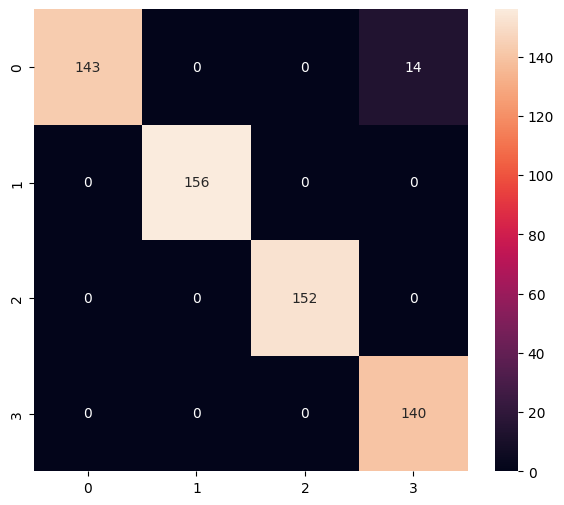

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       157
           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       152
           3       0.91      1.00      0.95       140

    accuracy                           0.98       605
   macro avg       0.98      0.98      0.98       605
weighted avg       0.98      0.98      0.98       605



In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(Y_true, Y_pred, report=True):
    labels = sorted(list(set(Y_true)))
    cmx_data = confusion_matrix(Y_true, Y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7,6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(Y_true)),0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(Y_test, Y_pred))

Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(Y_test, Y_pred)

In [17]:
model.save(model_save_path, include_optimizer=False)

INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


INFO:tensorflow:Assets written to: model/keypoint_classifier/keypoint_hdf5/assets


In [18]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/v6/rj0rjt8x0c9_f_dcfqgnsg6r0000gn/T/tmp8d6fpe0f/assets


INFO:tensorflow:Assets written to: /var/folders/v6/rj0rjt8x0c9_f_dcfqgnsg6r0000gn/T/tmp8d6fpe0f/assets
2026-01-16 12:18:04.525973: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2026-01-16 12:18:04.526162: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2026-01-16 12:18:04.530385: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/v6/rj0rjt8x0c9_f_dcfqgnsg6r0000gn/T/tmp8d6fpe0f
2026-01-16 12:18:04.530891: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2026-01-16 12:18:04.530897: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/v6/rj0rjt8x0c9_f_dcfqgnsg6r0000gn/T/tmp8d6fpe0f
2026-01-16 12:18:04.533542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2026-01-16 12:18:04.534017: I tensorflow/cc/saved_model/load

6560

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 295 μs, sys: 739 μs, total: 1.03 ms
Wall time: 804 μs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9352247e-01 1.4804781e-06 7.7680279e-11 6.4760349e-03]
0
